In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = [15, 10]
#mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.dpi'] = 100

In [2]:
df = pd.read_csv("./expression_table.txt", sep="\t")
df.head(5)

transcript  ENCSR896CFV  ENCSR066FZL  ENCSR624FBY  ENCSR182DAW  \
0  ENST00000618881     0.000000     0.062314          0.0     0.000000   
1  ENST00000618882     1.174078     0.373155          0.0     0.000000   
2  ENST00000618885     0.000000     0.000000          0.0     0.000000   
3  ENST00000618886     0.000000     0.000000          0.0     0.000000   
4  ENST00000618887     0.000000     0.000000          0.0     3.835886   

   ENCSR807ODB  ENCSR174OYC  ENCSR354XQY  ENCSR952QDQ  ENCSR000CPG  ...  \
0     0.000000     0.018213          0.0     0.105663     0.016148  ...   
1     0.172526     0.000000          0.0     0.159642     0.000000  ...   
2     0.000000     0.000000          0.0     0.000000     0.000000  ...   
3     0.000000     0.000000          0.0     0.000000     0.000000  ...   
4     0.000000     2.304583          0.0     2.976524     0.000360  ...   

   ENCSR964YTW  ENCSR685JXU  ENCSR416ZJH  ENCSR379VXW  ENCSR450ENK  \
0     0.000000          0.0     0.096716     0.000000     0.000000   
1     0.000000          0.0     0.000000     0.000000     0.000000   
2     0.000000          0.0     0.000000     0.000000    16.058062   
3     0.000000          0.0     0.000000     0.000000     0.000000   
4     0.000151          0.0     2.035378     2.964353     0.000000   

   ENCSR000AFB  ENCSR000CQE  ENCSR076PMZ  ENCSR000AAA  ENCSR000CPT  
0          0.0     0.000000     0.031408     0.000000          0.0  
1          0.0     0.000000     0.000000     0.000000          0.0  
2          0.0     0.000000     0.225176     0.000000          0.0  
3          0.0     0.000000     0.000000     0.000000          0.0  
4          0.0     0.580016     0.000000     0.045349          0.0  

[5 rows x 819 columns]

In [3]:
df.shape

(563431, 819)

In [4]:
df2 = pd.read_csv("./lncRNAs/lncrnas_data.txt", sep="\t")
df2= df2[["Transcript", "Class code", "Transcript type"]]
df2.columns = ["transcript", "Class code", "Transcript type"]
df2.head()

/home/alexey/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (3,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


transcript Class code Transcript type
0  MSTRG.11448.14          x  protein_coding
1  MSTRG.11448.15          x  protein_coding
2    MSTRG.4613.1          x  protein_coding
3    MSTRG.8499.1          i  protein_coding
4   MSTRG.10696.1          j   antisense_RNA

In [5]:
mask = df.transcript.isin(df2.transcript)
df = df[mask]
df.shape

(78514, 819)

In [6]:
df = df.reset_index(drop=True)
df.head()

transcript  ENCSR896CFV  ENCSR066FZL  ENCSR624FBY  ENCSR182DAW  \
0  ENST00000618882     1.174078     0.373155          0.0          0.0   
1  ENST00000618885     0.000000     0.000000          0.0          0.0   
2    MSTRG.29225.1     0.000000     0.000000          0.0          0.0   
3    MSTRG.64127.2     0.000000     0.000000          0.0          0.0   
4    MSTRG.64127.1     0.000000     0.121070          0.0          0.0   

   ENCSR807ODB  ENCSR174OYC  ENCSR354XQY  ENCSR952QDQ  ENCSR000CPG  ...  \
0     0.172526          0.0          0.0     0.159642          0.0  ...   
1     0.000000          0.0          0.0     0.000000          0.0  ...   
2     0.000000          0.0          0.0     0.000000          0.0  ...   
3     0.000000          0.0          0.0     0.000000          0.0  ...   
4     0.000000          0.0          0.0     0.055682          0.0  ...   

   ENCSR964YTW  ENCSR685JXU  ENCSR416ZJH  ENCSR379VXW  ENCSR450ENK  \
0          0.0          0.0          0.0          0.0     0.000000   
1          0.0          0.0          0.0          0.0    16.058062   
2          0.0          0.0          0.0          0.0     0.000000   
3          0.0          0.0          0.0          0.0     0.000000   
4          0.0          0.0          0.0          0.0     0.000000   

   ENCSR000AFB  ENCSR000CQE  ENCSR076PMZ  ENCSR000AAA  ENCSR000CPT  
0          0.0          0.0     0.000000          0.0          0.0  
1          0.0          0.0     0.225176          0.0          0.0  
2          0.0          0.0     0.000000          0.0          0.0  
3          0.0          0.0     0.000000          0.0          0.0  
4          0.0          0.0     0.159951          0.0          0.0  

[5 rows x 819 columns]

In [7]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X = StandardScaler().fit_transform(np.log2(X+1))
#X = StandardScaler().fit_transform(np.log2(X+1))
X

array([[ 1.02205681, -0.13997396, -0.49324049, ..., -0.51353101,
        -0.41909034, -0.55607318],
       [-0.40106379, -0.64591679, -0.49324049, ..., -0.16134743,
        -0.41909034, -0.55607318],
       [-0.40106379, -0.64591679, -0.49324049, ..., -0.51353101,
        -0.41909034, -0.55607318],
       ...,
       [-0.40106379, -0.59880602, -0.49324049, ..., -0.51353101,
        -0.30764533, -0.55607318],
       [ 1.40046859,  2.42060357,  0.225808  , ...,  1.2354284 ,
        -0.19622236, -0.05627402],
       [-0.40106379, -0.64591679, -0.49324049, ..., -0.16889969,
        -0.41909034, -0.53855146]])

In [8]:
# define the number of features
ncol= X.shape[1]
ncol

818

In [9]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

def plot_history(history):
    acc = history.history['loss']
    val_acc = history.history['val_loss']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, loss, 'b', label='Training acc')
    plt.plot(x, val_loss, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
eas = EarlyStopping(monitor='loss', min_delta=0.01, patience=3, verbose=0,
                              mode='max', baseline=None, restore_best_weights=True)

In [33]:
input_dim = X.shape[1]

m = Sequential()
m.add(Dense(1024, activation='elu', input_shape=(ncol,)))
m.add(Dense(512, activation='elu'))
m.add(Dense(256, activation='elu'))
m.add(Dense(128, activation='elu'))
m.add(Dense(10, activation = 'linear', name="bottleneck"))
m.add(Dense(128, activation='elu'))
m.add(Dense(256, activation='elu'))
m.add(Dense(512, activation='elu'))
m.add(Dense(1024, activation='elu'))
m.add(Dense(ncol, activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = "adam")
history = m.fit(X, X, batch_size=150, epochs=20, verbose=1, validation_data=(X, X))

Train on 78514 samples, validate on 78514 samples
Epoch 1/20
78514/78514 [==============================] - 47s 604us/sample - loss: 0.6887 - val_loss: 0.6651
Epoch 2/20
78514/78514 [==============================] - 44s 559us/sample - loss: 0.6611 - val_loss: 0.6568
Epoch 3/20
78514/78514 [==============================] - 44s 557us/sample - loss: 0.6554 - val_loss: 0.6531
Epoch 4/20
78514/78514 [==============================] - 45s 567us/sample - loss: 0.6532 - val_loss: 0.6515
Epoch 5/20
78514/78514 [==============================] - 44s 567us/sample - loss: 0.6516 - val_loss: 0.6507
Epoch 6/20
78514/78514 [==============================] - 36s 460us/sample - loss: 0.6506 - val_loss: 0.6498
Epoch 7/20
78514/78514 [==============================] - 44s 556us/sample - loss: 0.6500 - val_loss: 0.6498
Epoch 8/20
78514/78514 [==============================] - 44s 556us/sample - loss: 0.6493 - val_loss: 0.6480
Epoch 9/20
78514/78514 [==============================] - 44s 557us/sample - l

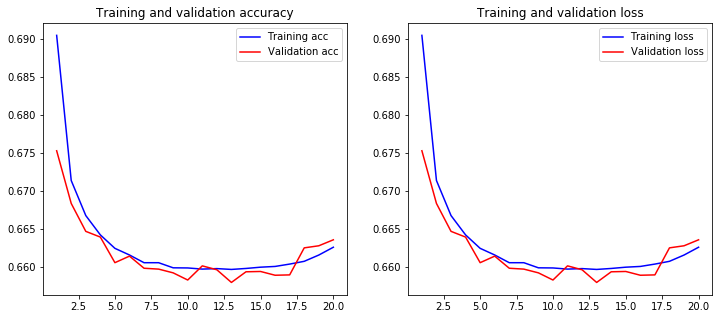

In [29]:
plot_history(history)

 There is no accuracy, only loss

In [34]:
encoder = Model(m.input, m.get_layer('bottleneck').output)
encoded = encoder.predict(X)  # bottleneck representation
encoderDf = pd.DataFrame(data = encoded
             , columns = ['EC1', 'EC2','EC3', 'EC4', 'EC5','EC6', 'EC7', 'EC8','EC9', 'EC10'])
encoderDf.head(3)

EC1       EC2        EC3        EC4        EC5       EC6        EC7  \
0 -11.457929  2.687776   4.594523  -9.273126   6.078201 -2.217525   7.929243   
1  -1.347425  0.424789 -10.671882 -16.671846  -7.480884  2.638523  14.551852   
2   4.917476  1.415332  -2.071350   3.444477 -12.157583 -0.656279   8.020114   

         EC8       EC9      EC10  
0 -11.235504 -1.608713 -0.336352  
1  -4.696617 -7.950703 -5.234232  
2  -0.497496 -0.737849 -1.111489

In [35]:
finalDf2 = pd.concat([encoderDf, df[['transcript']]], axis = 1)
finalDf2.head(5)
finalDf2 = pd.merge(finalDf2, df2, on='transcript')
finalDf2.head(10)
finalDf2.to_csv("expression_autoencoder_10.csv", index=False)